In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows use of Display() for Dataframes.

# Import supplementary visualization code visuals.py
import visuals as vs

%matplotlib inline

data = pd.read_csv("autism_data.csv")
display(data.head(5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
# Total number of records:
n_records = len(data.index)

# Total number of records with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals with ASD
yes_percentage = float((n_asd_yes) / n_records * 100)

# Printing the outputs
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')
print("Percentage of individuals with ASD : {:.2f}%".format(yes_percentage))

Total number of records  : 704
Number of individuals with ASD : 189
Number of individuals without ASD : 515
Percentage of individuals with ASD : 26.85%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [6]:
data.isna().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [7]:
data.dropna(inplace=True)
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [8]:
# After Data Cleaning

# Total number of records:
n_records = len(data.index)

# Total number of records with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Total number of records without ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Printing the outputs
print("AFTER REMOVING NULL VALUES : ")
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')


AFTER REMOVING NULL VALUES : 
Total number of records  : 702
Number of individuals with ASD : 189
Number of individuals without ASD : 513


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

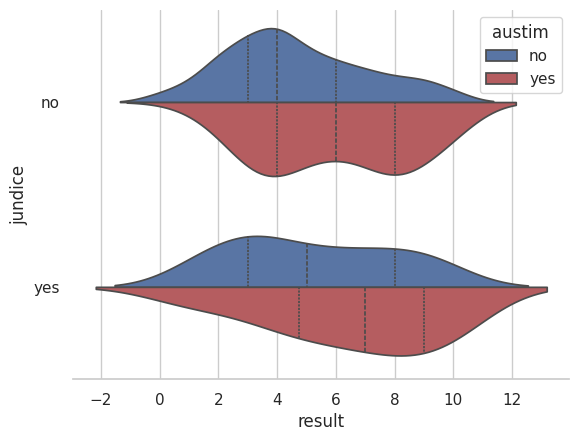

In [10]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="austim", data=data, split=True,inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

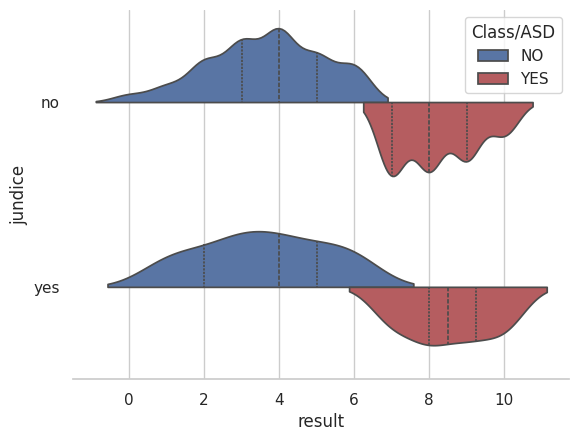

In [11]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

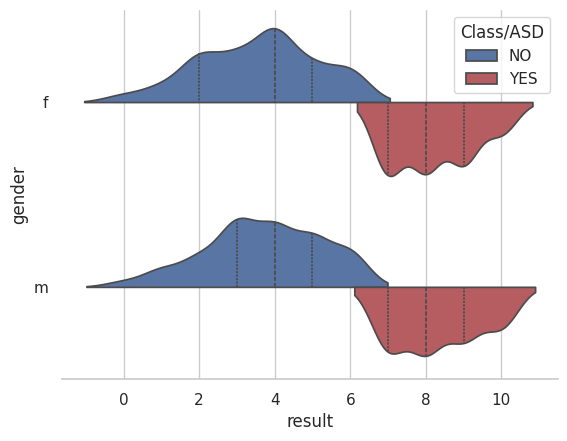

In [12]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="gender", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

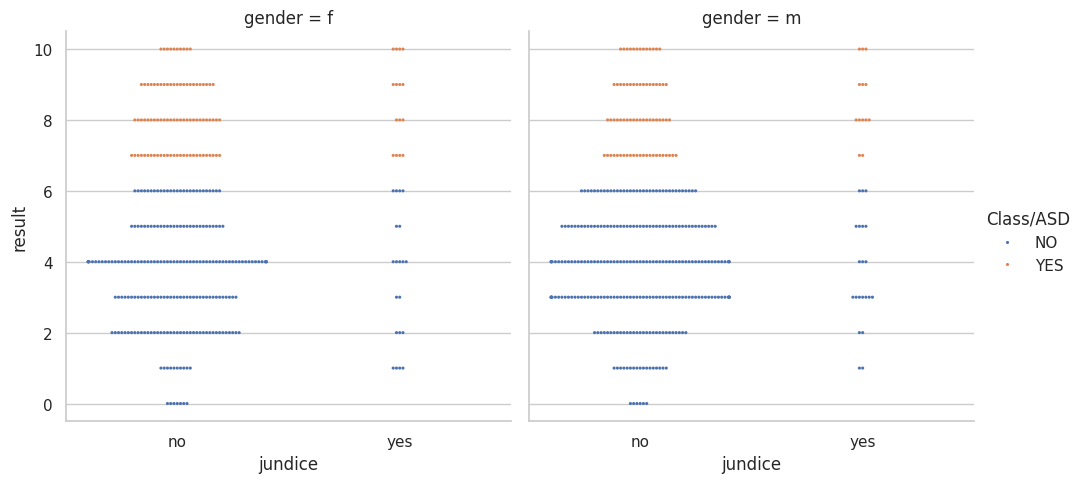

In [13]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", s = 5, col="gender", data=data, kind="swarm");

In [14]:
data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = ['age','result']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[num] = scaler.fit_transform(features_raw[num])

In [16]:
display(features_minmax_transform.head(5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
4,0.062842,f,?,no,no,Egypt,0.2,?,1,0,0,0,0,0,0,1,0,0


In [17]:
features_final = pd.get_dummies(features_minmax_transform)
features_final.head(5)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_?,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,False,True,False,False,False,False,False,False,False,True
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,False,False,False,False,False,False,False,True,False,False
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,False,True,False,False,False,False,False,False,False,True
4,0.062842,0.2,1,0,0,0,0,0,0,1,...,False,False,False,False,True,False,False,False,False,False


In [18]:
data_classes = data_raw.apply(lambda x : 1 if x == 'YES' else 0)

In [19]:
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Cos

Text(0, 0.5, 'Frequency')

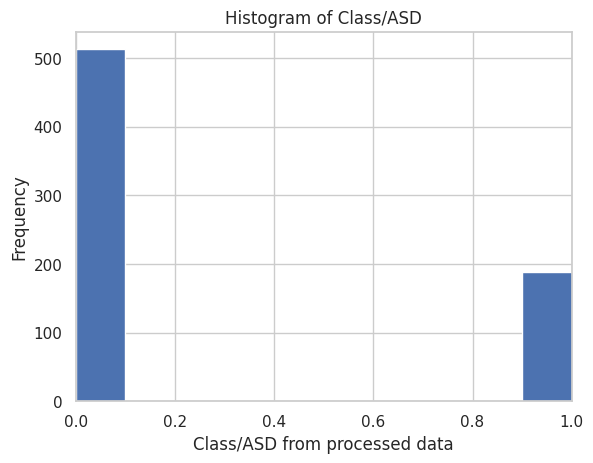

In [20]:
plt.hist(data_classes, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [21]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(features_final,data_classes,test_size=0.2, random_state=1)
print("Train set has {} enteries.".format(X_train.shape[0]))
print("Test set has {} enteries.".format(X_test.shape[0]))

Train set has 561 enteries.
Test set has 141 enteries.


Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # Importing cross_val_score

lr_model = LogisticRegression()
cv_score = cross_val_score(lr_model, features_final, data_classes, cv =10)
cv_score.mean()

0.9971428571428571

In [23]:
#F-beta Score
lr_model.fit(X_train.values, y_train)
from sklearn.metrics import fbeta_score
y_pred = lr_model.predict(X_test.values)
fbeta_score(y_test, y_pred, average='binary', beta=0.5)

0.9948979591836735

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform cross-validation
cv_score = cross_val_score(lr_model, features_final, data_classes, cv=10)
cv_mean = cv_score.mean()
print(f"Cross-Validation Score (Mean): {cv_mean:.2f}")

# Predicting on the test set
y_pred = lr_model.predict(X_test.values)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating additional efficiency metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculating F-beta score
fbeta = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

# Printing the metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1 Score: {f1:.2f}")
print(f"Model F-beta Score (Beta=0.5): {fbeta:.2f}")


Cross-Validation Score (Mean): 1.00
Model Accuracy: 99.29%
Model Precision: 1.00
Model Recall: 0.97
Model F1 Score: 0.99
Model F-beta Score (Beta=0.5): 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score

# Function to process a single user input
def process_user_input():
    print("Enter the input in the format:")
    print("age, gender, ethnicity, jundice, austim, contry_of_res, result, relation, A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score")
    print("Example: 25, male, Asian, yes, yes, USA, 0.7, Self, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1")

    user_input = input("Enter your data: ")
    # Define column names
    columns = ['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result', 'relation',
               'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',
               'A8_Score', 'A9_Score', 'A10_Score']

    # Parse input
    row = user_input.split(',')
    if len(row) != len(columns):
        raise ValueError(f"Each row must contain exactly {len(columns)} columns.")

    # Create a DataFrame from the input
    data = pd.DataFrame([row], columns=columns)

    # Convert numeric columns
    data['age'] = pd.to_numeric(data['age'], errors='coerce')
    data['result'] = pd.to_numeric(data['result'], errors='coerce')
    for col in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(inplace=True)

    # Encode features
    scaler = MinMaxScaler()
    num = ['age', 'result']
    data[num] = scaler.fit_transform(data[num])
    data = pd.get_dummies(data)

    return data

# Example usage
data = process_user_input()
# Mock training example (replace with actual trained model and data)
example_X = np.array([[0.2, 0.3] + [0] * (data.shape[1] - 2)])  # Mock training data
example_y = np.array([1])  # Mock labels (1 = Autism, 0 = No Autism)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)  # Mock training

# Align input data with training data features
missing_cols = set(features_final.columns) - set(data.columns)
for col in missing_cols:
    data[col] = 0  # Add missing columns and fill with 0

# Reorder columns to match training data
data = data[features_final.columns]

# Predict the input
prediction = lr_model.predict(data.values)

# Map prediction to autism diagnosis
autism_diagnosis = "Autism Detected" if prediction[0] == 1 else "No Autism Detected"

# Output
print("Processed input data:")
print(data)
print(f"Predicted Autism Diagnosis: {autism_diagnosis}")


Enter the input in the format:
age, gender, ethnicity, jundice, austim, contry_of_res, result, relation, A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score
Example: 25, male, Asian, yes, yes, USA, 0.7, Self, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1
Enter your data: 25, male, Asian, yes, yes, USA, 0.7, Self, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1
Processed input data:
   age  result  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0  0.0     0.0         1         0         1         1         0         1   

   A7_Score  A8_Score  ...  contry_of_res_United Kingdom  \
0         0         0  ...                             0   

   contry_of_res_United States  contry_of_res_Uruguay  contry_of_res_Viet Nam  \
0                            0                      0                       0   

   relation_?  relation_Health care professional  relation_Others  \
0           0                                  0                0   

   relation_Parent  rel

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
